In [1]:

import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


In [2]:
excel_file = r"C:\Users\adira\Downloads\SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx"  # Replace with actual path
years = range(2010, 2017)

# df = pd.read_excel(r"path_data.xlsx")

In [3]:
years[3]

2013

In [4]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[3]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1


In [5]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[3]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.385,0.072,0.457,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.737,0.080,0.817,NaN,4,3,1,4,1


In [6]:
all_data = []
year=2013;
for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [7]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [8]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [9]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [11]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Name','Code','Year'], inplace=True)

In [12]:
mask = df['Margins of Supply Chain Emission Factors'] == 'Main feature'
print(mask)
df.loc[mask, 'Margins of Supply Chain Emission Factors'] = 0.183

0        False
1        False
2        False
3        False
4        False
         ...  
22087    False
22088    False
22089    False
22090    False
22091    False
Name: Margins of Supply Chain Emission Factors, Length: 22092, dtype: bool


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  object 
 1   Unit                                                    22092 non-null  object 
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  object 
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

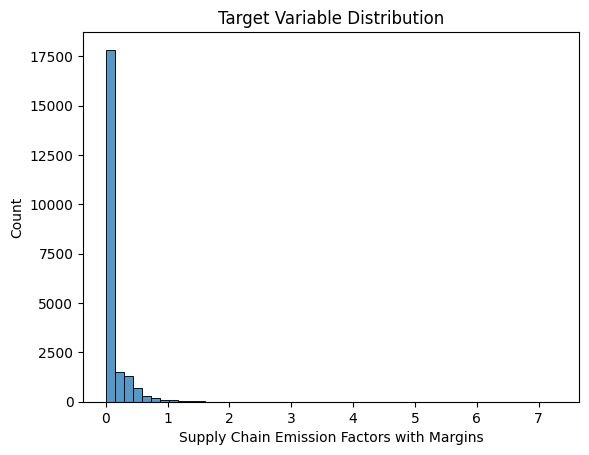

In [14]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [15]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [16]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [17]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


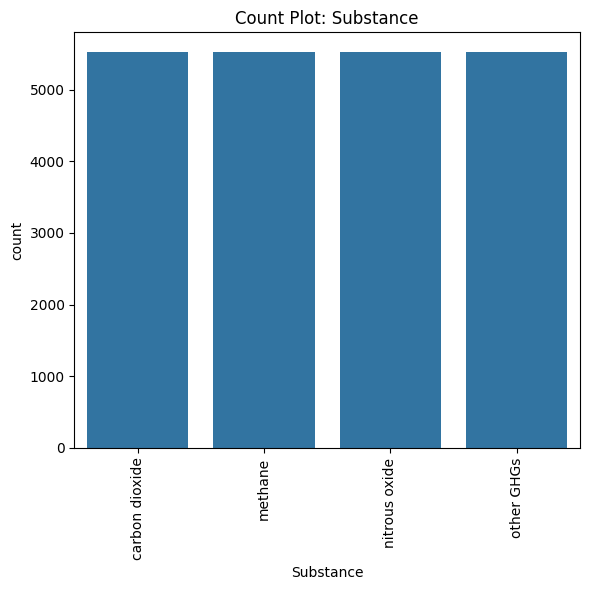

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

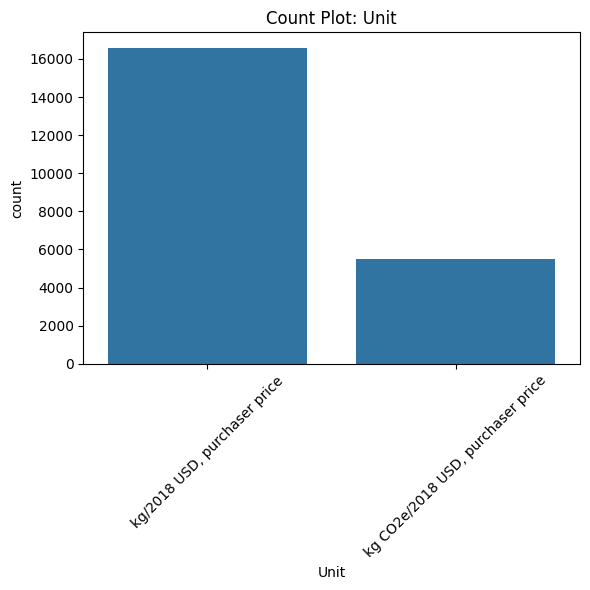

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

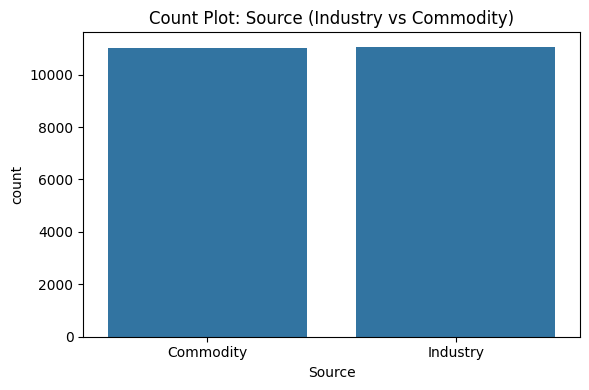

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [23]:
df.select_dtypes(include=np.number).corr()

,Supply Chain Emission Factors without Margins,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
Supply Chain Emission Factors without Margins,1.000000,0.962971,-0.098000,0.009284,NaN,0.148410,NaN
Supply Chain Emission Factors with Margins,0.962971,1.000000,-0.109494,0.010748,NaN,0.160574,NaN
DQ ReliabilityScore of Factors without Margins,-0.098000,-0.109494,1.000000,-0.021707,NaN,0.073583,NaN
DQ TemporalCorrelation of Factors without Margins,0.009284,0.010748,-0.021707,1.000000,NaN,-0.030607,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.148410,0.160574,0.073583,-0.030607,NaN,1.000000,NaN
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN


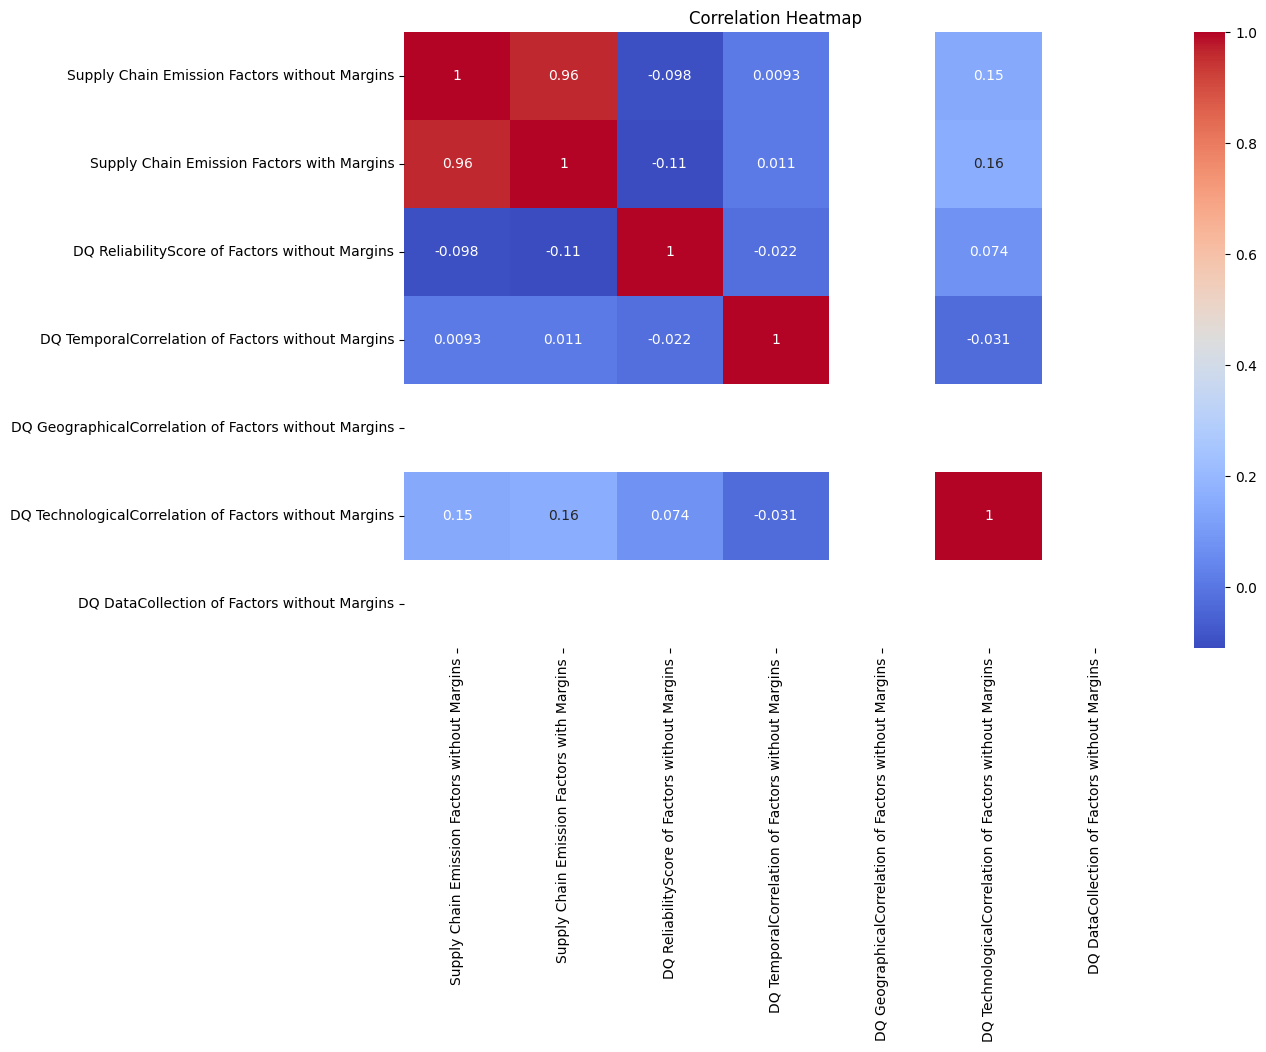

In [24]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
categorical_cols = ['Substance','Unit','Source']

for col in categorical_cols:
    le = LabelEncoder()
    if df[col].dtype == 'object' or str(df[col].dtype).startswith('category'):
        df[col] = le.fit_transform(df[col].astype(str))  # Ensures all values are strings
        encoders[col] = le

In [15]:
df.dtypes

Substance                                                   int64
Unit                                                        int64
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                   object
Supply Chain Emission Factors with Margins                float64
DQ ReliabilityScore of Factors without Margins              int64
DQ TemporalCorrelation of Factors without Margins           int64
DQ GeographicalCorrelation of Factors without Margins       int64
DQ TechnologicalCorrelation of Factors without Margins      int64
DQ DataCollection of Factors without Margins                int64
Source                                                      int64
dtype: object

In [16]:
df['Margins of Supply Chain Emission Factors'] = df['Margins of Supply Chain Emission Factors'].astype(float)
df.dtypes

Substance                                                   int64
Unit                                                        int64
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                  float64
Supply Chain Emission Factors with Margins                float64
DQ ReliabilityScore of Factors without Margins              int64
DQ TemporalCorrelation of Factors without Margins           int64
DQ GeographicalCorrelation of Factors without Margins       int64
DQ TechnologicalCorrelation of Factors without Margins      int64
DQ DataCollection of Factors without Margins                int64
Source                                                      int64
dtype: object

In [17]:
for col, le in encoders.items():
    print(f"Encoding for '{col}':")
    mapping = {class_: int(code) for class_, code in zip(le.classes_, le.transform(le.classes_))}
    print(mapping)
    print()

Encoding for 'Substance':
{'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}

Encoding for 'Unit':
{'kg CO2e/2018 USD, purchaser price': 0, 'kg/2018 USD, purchaser price': 1}

Encoding for 'Source':
{'Commodity': 0, 'Industry': 1}



In [18]:
# 2. Split features (X) and target (y)
X = df.drop('Supply Chain Emission Factors with Margins', axis=1)
y = df['Supply Chain Emission Factors with Margins']

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 4. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [23]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("📊 Model Comparison:")
print(results_df)

📊 Model Comparison:
                        MSE       MAE        R²
Linear Regression  0.000008  0.000139  0.999864
Random Forest      0.000042  0.000755  0.999248
SVR                0.004314  0.055000  0.923204
XGBoost            0.000148  0.001795  0.997362


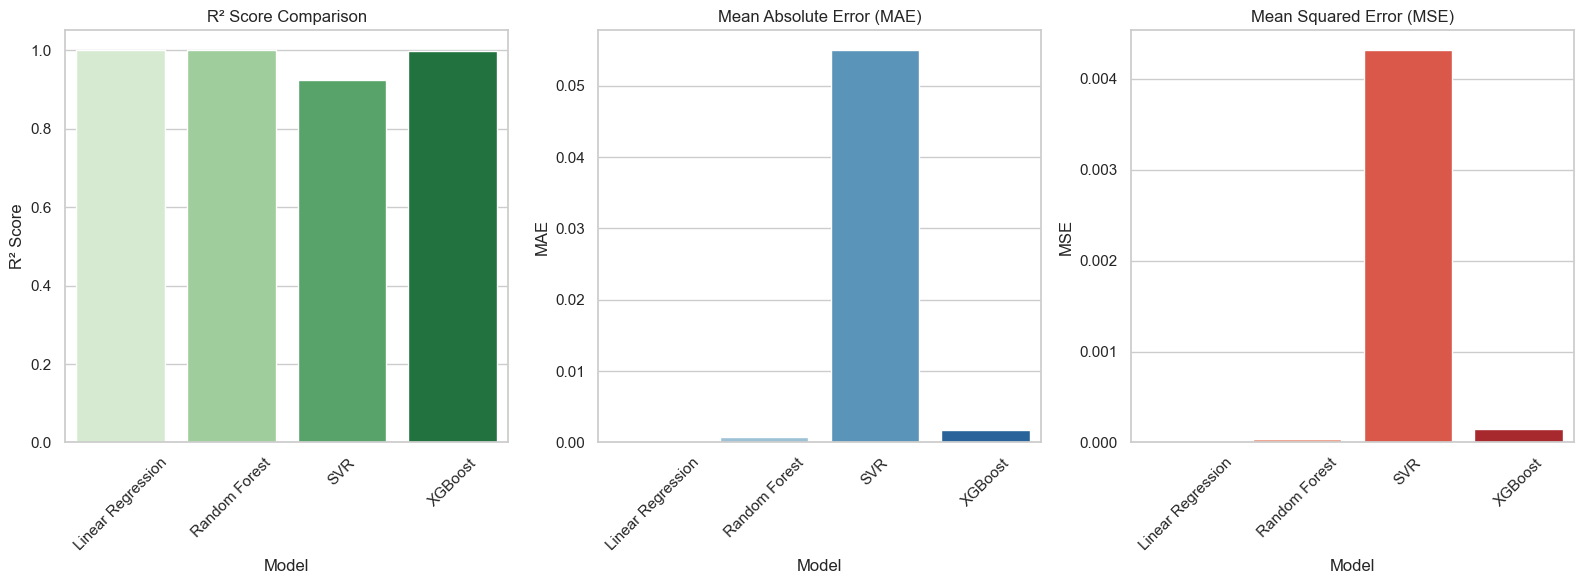

In [24]:
import seaborn as sns

results_df['Model'] = ['Linear Regression', 'Random Forest', 'SVR', 'XGBoost']

# Set the seaborn style
sns.set(style='whitegrid')

# Set up the figure
plt.figure(figsize=(16, 6))

# 1️⃣ R² Score Plot
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R²', data=results_df, palette='Greens',hue='Model',legend=False)
plt.title('R² Score Comparison')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# 2️⃣ MAE Plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df, palette='Blues',hue='Model',legend=False)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.ylabel('MAE')

# 3️⃣ MSE Plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds',hue='Model',legend=False)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.ylabel('MSE')

# Layout adjustment
plt.tight_layout()
plt.show()


In [25]:
# Train the XGB model
import xgboost as xgb
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=200,        # Number of trees
    learning_rate=0.05,      # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("📈 Final XGB Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ₹{mae:,.2f}")
print(f"MSE: ₹{mse:,.2f}")

📈 Final XGB Model Performance:
R² Score: 0.9974
MAE: ₹0.00
MSE: ₹0.00


In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Base model
xgb_model = XGBRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score: 0.994691269311116


In [27]:
best_xgb = grid_search.best_estimator_  # or grid_search.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Final XGB Performance:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Final XGB Performance:
R²: 0.9944090110420917
MAE: 0.0019256266361146058
MSE: 0.0003140490721379824


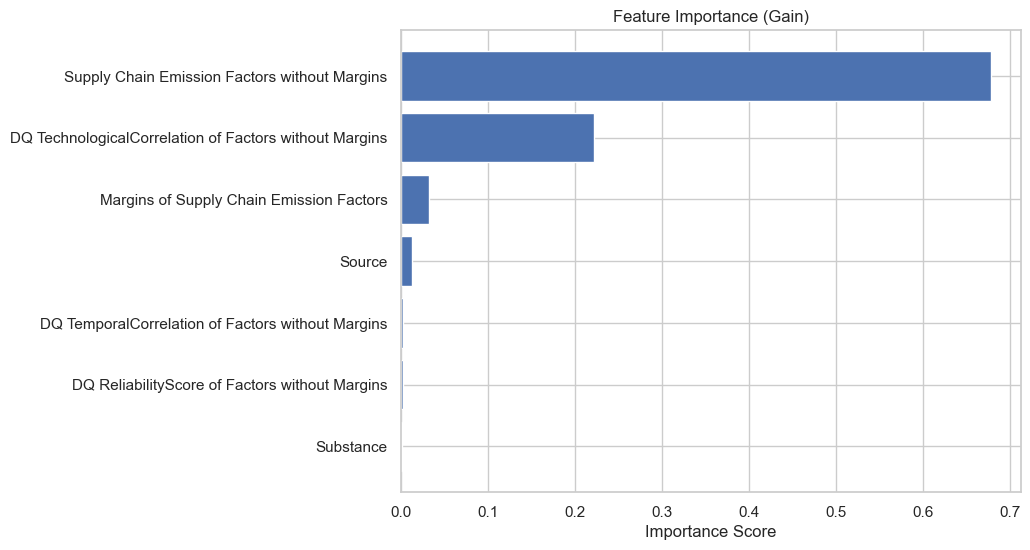

In [28]:
import pandas as pd

# Extract feature importance
importance_dict = best_xgb.get_booster().get_score(importance_type='gain')

# Convert to DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Gain)")
plt.xlabel("Importance Score")
plt.show()


In [29]:
import joblib

# Save the model with compression (optional)
joblib.dump(best_xgb, 'xgb_model_compressed.pkl', compress=3)


['xgb_model_compressed.pkl']

In [38]:
input_data = np.array([[0,1,0.65,1.27,2,4,1,2,1,0]])

predicted_value = best_xgb.predict(input_data)[0]

# Step 5: Display result
print(f"✅ Predicted Emission Factor: {predicted_value:.4f}")

✅ Predicted Emission Factor: 2.4422
